# Геометрическая вероятность

**Условие**  
Игрок набрасывает кольца на колышек с закрытыми глазами.  
Кольцо падает случайным образом на квадратный участок со стороной $ a $.  
В центре участка находится мишень — круглый колышек радиуса $ r $.

Известно, что площадь колышка составляет 1/10 площади квадрата.

**Требуется**  
Найти вероятность того, что случайно брошенное кольцо накроет колышек (т.е. центр кольца попадёт в пределы колышка).


ТЕОРЕТИЧЕСКИЙ РАСЧЁТ
Площадь квадрата: 100.00
Площадь колышка: 10.00 = 1/10 площади квадрата
Радиус колышка: R = √(S/π) = 1.784
Вероятность попадания: P = S_колышка / S_квадрата = 0.100
--------------------------------------------------
Число испытаний: 5000
Число попаданий: 511
Эмпирическая вероятность: 0.1022
Абсолютная погрешность: |P_emp - P_theor| = 0.0022


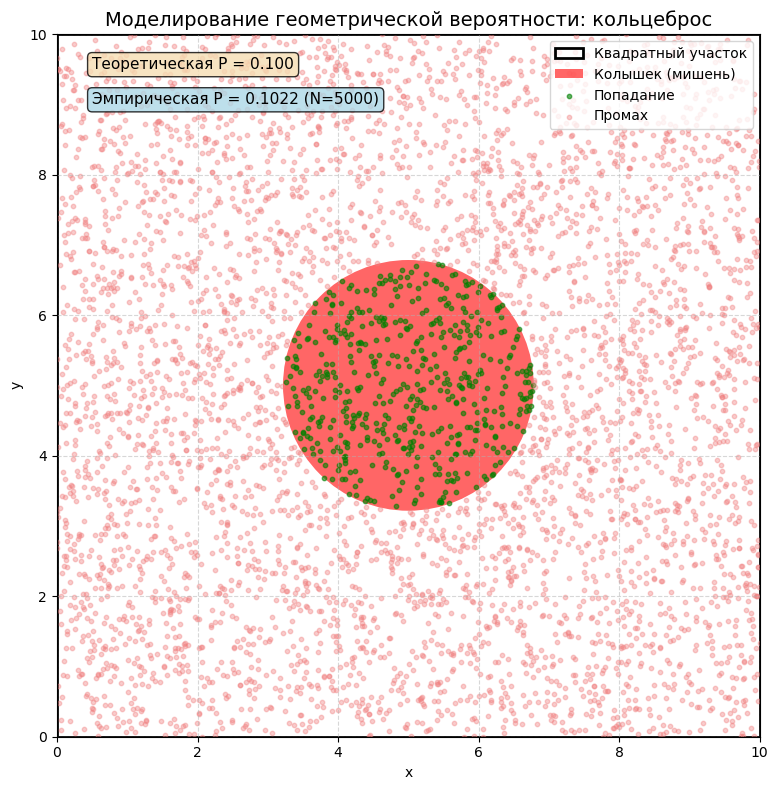

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

square_side = 10.0                       
square_area = square_side ** 2

target_area = square_area / 10
target_radius = np.sqrt(target_area / np.pi) 

# Теоретическая вероятность
p_theoretical = target_area / square_area  # = 0.1

print("ТЕОРЕТИЧЕСКИЙ РАСЧЁТ")
print(f"Площадь квадрата: {square_area:.2f}")
print(f"Площадь колышка: {target_area:.2f} = 1/10 площади квадрата")
print(f"Радиус колышка: R = √(S/π) = {target_radius:.3f}")
print(f"Вероятность попадания: P = S_колышка / S_квадрата = {p_theoretical:.3f}")
print("-" * 50)

np.random.seed(42) 
N = 5000

x = np.random.uniform(0, square_side, N)
y = np.random.uniform(0, square_side, N)

cx, cy = square_side / 2, square_side / 2

distances = np.sqrt((x - cx)**2 + (y - cy)**2)
hits = distances <= target_radius
n_hits = np.sum(hits)
p_empirical = n_hits / N

print(f"Число испытаний: {N}")
print(f"Число попаданий: {n_hits}")
print(f"Эмпирическая вероятность: {p_empirical:.4f}")
print(f"Абсолютная погрешность: |P_emp - P_theor| = {abs(p_empirical - p_theoretical):.4f}")

plt.figure(figsize=(8, 8))

plt.gca().add_patch(Rectangle((0, 0), square_side, square_side,
                              fill=False, edgecolor='black', linewidth=2, label='Квадратный участок'))

plt.gca().add_patch(Circle((cx, cy), target_radius,
                           facecolor='red', alpha=0.6, label='Колышек (мишень)'))

plt.scatter(x[hits], y[hits], c='green', s=10, alpha=0.6, label='Попадание')
plt.scatter(x[~hits], y[~hits], c='lightcoral', s=10, alpha=0.4, label='Промах')

plt.xlim(0, square_side)
plt.ylim(0, square_side)
plt.gca().set_aspect('equal')
plt.title('Моделирование геометрической вероятности: кольцеброс', fontsize=14)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Подпись вероятностей
plt.text(0.05, 0.95, f'Теоретическая P = {p_theoretical:.3f}',
         transform=plt.gca().transAxes, fontsize=11, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="wheat", alpha=0.8))
plt.text(0.05, 0.90, f'Эмпирическая P = {p_empirical:.4f} (N={N})',
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

plt.tight_layout()
plt.show()